<a href="https://colab.research.google.com/github/jasxn808/Multiple-Regression/blob/main/Multiple_Regression_Receiving_Yards_over_Expected_(RYOE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# predicting effect of several pridictors on response variable (receiving yards) using linear combination of predictor variables.

In [1]:
pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=a238f5f64585195d5011d9161fb02814c71e6e53a060bb54a9c22681482302b2
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [3]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


seasons = range(2016, 2022 + 1)
pbp_py = nfl.import_pbp_data(seasons)
pd.options.display.max_columns = None

2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


In [6]:
pbp_py.head(5)

#features included: down, air_yards, distance(ydstogo), yards to go to endzone(yardline_100), score_differential, pass_location?
#adtl columns needed: receiver_player_id, receiver_player_name, receiving_yards


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [169]:
pbp_py_pass = \
pbp_py.query('play_type == "pass" & receiving_yards.notnull() & pass_location.notnull()') \
      [['receiver_player_id', 'receiver_player_name', 'receiving_yards' \
        ,'down', 'air_yards', 'ydstogo','yardline_100', 'score_differential', 'pass_location', 'desc', 'season']]
pbp_py_pass['air_yards'].fillna(0, inplace=True)
#pbp_py_pass['pass_location'].fillna('Screen', inplace=True)

pbp_py_pass.reset_index(inplace=True)

#identifying nulls
# def nans(pbp_py_pass): return pbp_py_pass[pbp_py_pass.isnull().any(axis=1)]
# nans(pbp_py_pass)

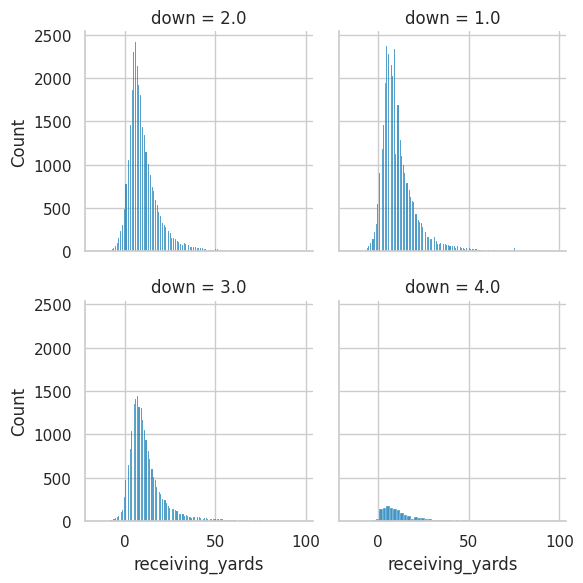

In [62]:
##histogram plotting:
sns.set_theme(style='whitegrid', palette='colorblind')

# want Downs to be discrete, not continuous, var
pbp_py_pass.down = pbp_py_pass.down.astype(str)

hist = \
  sns.FacetGrid(data=pbp_py_pass\
                , col='down', col_wrap=2);

hist.map_dataframe(sns.histplot, x='receiving_yards');
plt.show;

## down to go -> decreases receiving yards -> 1st/2nd down = focus on gaining most yards; 3rd+4th = moving the sticks/keeping drive alive

<Axes: xlabel='down', ylabel='receiving_yards'>

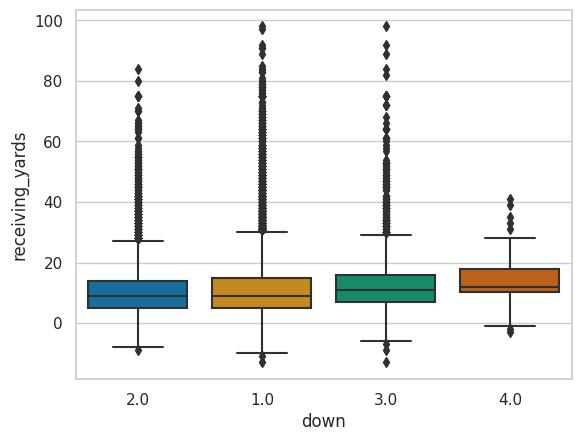

In [68]:
sns.boxplot\
  (data=pbp_py_pass.query('ydstogo == 10'),\
   x='down', y='receiving_yards')


<Axes: xlabel='yardline_100', ylabel='receiving_yards'>

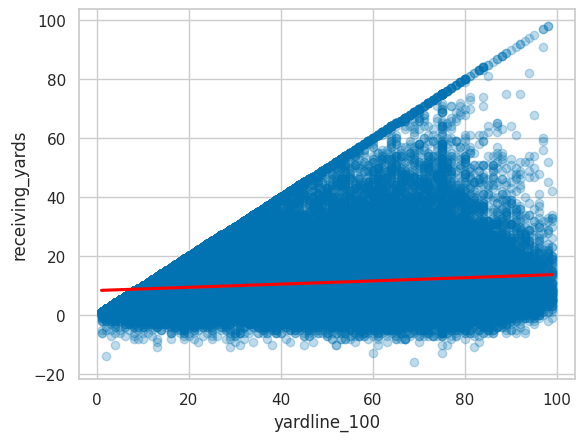

In [69]:
sns.regplot(\
    data=pbp_py_pass
    , x='yardline_100'
    , y='receiving_yards'
    , scatter_kws={'alpha':.25}
    , line_kws={'color':'red'}
)

<Axes: xlabel='yardline_100', ylabel='receiving_yards_mean'>

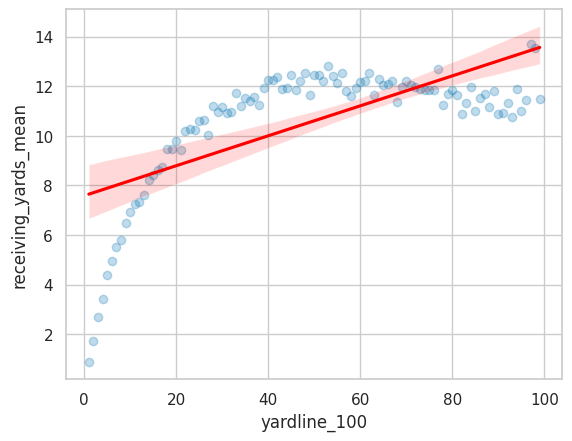

In [107]:
yds100_agg = \
pbp_py_pass\
  .groupby(['yardline_100']) \
  .agg({'receiving_yards':['mean', 'count']})


yds100_agg.columns = list(map('_'.join, yds100_agg.columns))
yds100_agg.reset_index(inplace=True)

sns.regplot(\
    data=yds100_agg
    , x='yardline_100'
    , y='receiving_yards_mean'
    , scatter_kws={'alpha':.25}
    , line_kws={'color':'red'}
)

<Axes: xlabel='pass_location', ylabel='receiving_yards'>

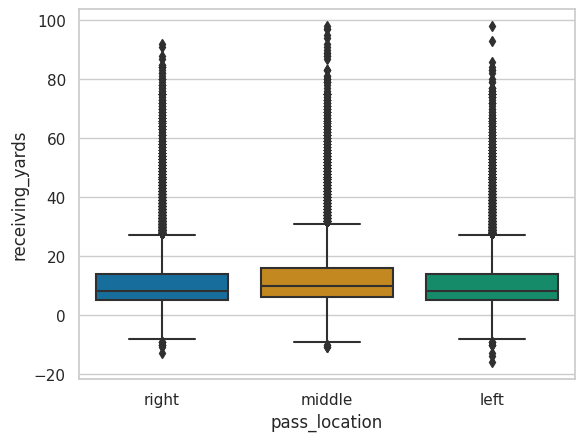

In [113]:
sns.boxplot(data=pbp_py_pass
            ,x='pass_location'
            , y= 'receiving_yards')

<Axes: xlabel='score_differential', ylabel='receiving_yards_mean'>

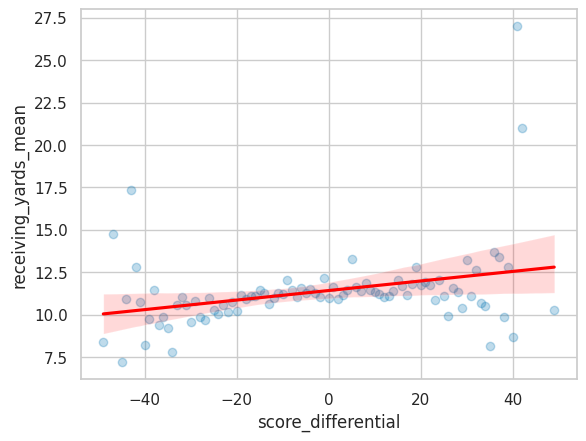

In [131]:
pbp_py_pass_scorediff = \
pbp_py_pass\
  .groupby('score_differential')\
  .agg({'receiving_yards':['mean']})

pbp_py_pass_scorediff.columns = list(map('_'.join, pbp_py_pass_scorediff.columns))

pbp_py_pass_scorediff.reset_index(inplace=True)


sns.regplot(\
    data=pbp_py_pass_scorediff
    , x='score_differential'
    , y='receiving_yards_mean'
    , scatter_kws={'alpha':.25}
    , line_kws={'color':'red'}
)

In [170]:
## Applying multiple linear regression:
# model equation: receiving_yards down * ydstogo + yardline_100 + pass_location + score_differential

pbp_py_pass.down =\
    pbp_py_pass.down.astype(str)

reg_model = smf.ols(formula = 'receiving_yards ~ 1 + down + ydstogo + down:ydstogo + yardline_100 + pass_location + score_differential + air_yards',\
                    data = pbp_py_pass)

print(reg_model.fit().summary())



                            OLS Regression Results                            
Dep. Variable:        receiving_yards   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     8770.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:51:52   Log-Likelihood:            -2.8036e+05
No. Observations:               84461   AIC:                         5.607e+05
Df Residuals:                   84448   BIC:                         5.609e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [171]:
pbp_py_pass['ryoe'] = reg_model.fit().resid

pbp_py_pass.head(5)

,index,receiver_player_id,receiver_player_name,receiving_yards,down,air_yards,ydstogo,yardline_100,score_differential,pass_location,desc,season,ryoe
0,3,00-0026373,J.Forsett,5.0,2.0,-4.0,4.0,80.0,0.0,right,"(14:32) (No Huddle, Shotgun) 5-J.Flacco pass s...",2016,1.845804
1,5,00-0029892,K.Juszczyk,9.0,2.0,1.0,10.0,75.0,0.0,right,(13:35) (No Huddle) 5-J.Flacco pass short righ...,2016,1.628627
2,9,00-0027029,L.McCoy,2.0,1.0,2.0,10.0,68.0,0.0,middle,(11:44) (Shotgun) 5-T.Taylor pass short middle...,2016,-6.286131
3,11,00-0030433,M.Gillislee,-4.0,3.0,-4.0,14.0,72.0,0.0,left,(10:15) (Shotgun) 5-T.Taylor pass short left t...,2016,-7.612688
4,13,00-0020337,S.Smith,3.0,1.0,3.0,10.0,66.0,0.0,right,(9:33) (Shotgun) 5-J.Flacco pass short right t...,2016,-6.124039


In [189]:
## summarizing RYOE

pbp_py_pass_RYOE = \
  pbp_py_pass\
    .groupby(['receiver_player_id','receiver_player_name','season'])\
    .agg({'ryoe':['sum','mean', 'count']})

pbp_py_pass_RYOE.columns = list(map('_'.join, pbp_py_pass_RYOE))
pbp_py_pass_RYOE.rename(columns = {'ryoe_sum':'total_ryoe', 'ryoe_mean':'ryoe_avg','ryoe_count':'n'}, inplace=True)
pbp_py_pass_RYOE = pbp_py_pass_RYOE.query('n > 75').reset_index()

In [190]:
pbp_py_pass_RYOE.sort_values('total_ryoe', ascending=False)

,index,receiver_player_id,receiver_player_name,season,total_ryoe,ryoe_avg,n
182,496,00-0035719,D.Samuel,2021,464.301268,5.336796,87
135,339,00-0033288,G.Kittle,2018,423.702325,4.814799,88
140,357,00-0033699,A.Ekeler,2019,412.208415,4.480526,92
132,334,00-0033280,C.McCaffrey,2019,318.243154,2.743475,116
197,531,00-0036900,J.Chase,2021,317.579824,2.996036,106
...,...,...,...,...,...,...,...
92,231,00-0031428,A.Robinson,2019,-209.621891,-2.138999,98
169,455,00-0034960,J.Meyers,2021,-213.971047,-2.404169,89
175,473,00-0035640,D.Metcalf,2022,-223.534893,-2.235349,100
87,223,00-0031408,M.Evans,2016,-241.034654,-2.510778,96


In [191]:
pbp_py_pass_RYOE.sort_values('ryoe_avg', ascending=False)

,index,receiver_player_id,receiver_player_name,season,total_ryoe,ryoe_avg,n
182,496,00-0035719,D.Samuel,2021,464.301268,5.336796,87
135,339,00-0033288,G.Kittle,2018,423.702325,4.814799,88
140,357,00-0033699,A.Ekeler,2019,412.208415,4.480526,92
197,531,00-0036900,J.Chase,2021,317.579824,2.996036,106
149,388,00-0033906,A.Kamara,2017,256.575933,2.983441,86
...,...,...,...,...,...,...,...
92,231,00-0031428,A.Robinson,2019,-209.621891,-2.138999,98
175,473,00-0035640,D.Metcalf,2022,-223.534893,-2.235349,100
172,463,00-0035216,D.Johnson,2022,-198.767331,-2.311248,86
169,455,00-0034960,J.Meyers,2021,-213.971047,-2.404169,89


In [205]:
## stability analysis:
ryoe_LY = pbp_py_pass_RYOE.copy()
ryoe_CY = pbp_py_pass_RYOE.copy()

ryoe_LY['season'] += 1


ryoe_comparison = \
ryoe_CY.merge\
  (ryoe_LY, how='inner', on=['season','receiver_player_id','receiver_player_name'])


ryoe_comparison.rename(columns = {'total_ryoe_x':'total_ryoe_CY', 'ryoe_avg_x':'ryoe_avg_CY', 'n_x':'n_CY'\
                                  , 'total_ryoe_y':'total_ryoe_LY', 'ryoe_avg_y':'ryoe_avg_LY', 'n_y':'n_LY'}, inplace=True)


ryoe_comparison.query('receiver_player_name == "J.Jefferson"')

,index_x,receiver_player_id,receiver_player_name,season,total_ryoe_CY,ryoe_avg_CY,n_CY,index_y,total_ryoe_LY,ryoe_avg_LY,n_LY
76,511,00-0036322,J.Jefferson,2021,-33.115416,-0.306624,108,510,51.284296,0.582776,88
77,512,00-0036322,J.Jefferson,2022,-9.895798,-0.073849,134,511,-33.115416,-0.306624,108


In [206]:
ryoe_comparison[['ryoe_avg_CY', 'ryoe_avg_LY']].corr()

,ryoe_avg_CY,ryoe_avg_LY
ryoe_avg_CY,1.000000,0.613435
ryoe_avg_LY,0.613435,1.000000


In [207]:
ryoe_comparison[['total_ryoe_CY', 'total_ryoe_LY']].corr()

,total_ryoe_CY,total_ryoe_LY
total_ryoe_CY,1.000000,0.627271
total_ryoe_LY,0.627271,1.000000


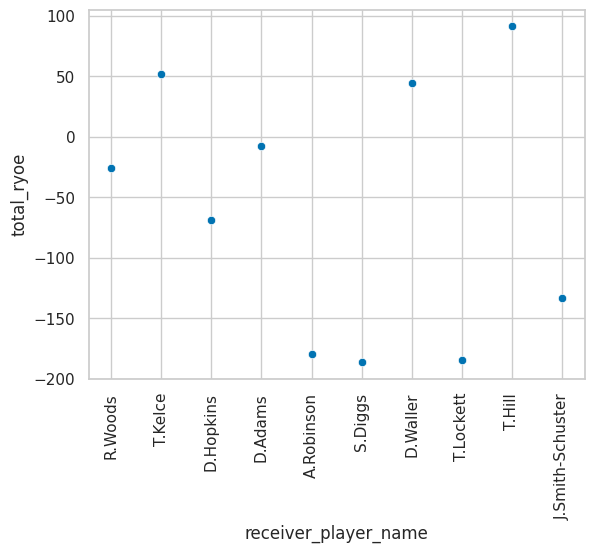

In [225]:
wr1 = \
pbp_py_pass_RYOE.query('n > 100 & season == 2020')


g =sns.scatterplot(data=wr1, x="receiver_player_name", y="total_ryoe");
g.tick_params(axis='x', rotation=90)